In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargar los 4 archivos
df1 = pd.read_csv('./cleaned_data/absolutos_misma_edad.csv')
df2 = pd.read_csv('./cleaned_data/absolutos_no_importa_edad.csv')
df3 = pd.read_csv('./cleaned_data/indices_misma_edad.csv')
df4 = pd.read_csv('./cleaned_data/indices_no_importa_edad.csv')

# Unir todos los DataFrames en uno solo (verticalmente)
df_unificado = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Verificar el resultado
print(f"Total de registros: {len(df_unificado)}")

Total de registros: 13212


In [4]:
df_unificado

,id,fuente,nombre,unidad_medida,tipo_medida,valor,anio,edad,edad_grupo,valor_norm
0,1,UNDP,Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child...,desconocido,desconocido,14824.000000,1950,15.0,Adolescencia,0.045707
1,3,UNDP,Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child...,desconocido,desconocido,40447.000000,1950,16.0,Adolescencia,0.124802
2,5,UNDP,Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child...,desconocido,desconocido,79014.000000,1950,17.0,Adolescencia,0.243853
3,7,UNDP,Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child...,desconocido,desconocido,129785.000000,1950,18.0,Adolescencia,0.400575
4,9,UNDP,Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child...,desconocido,desconocido,179007.000000,1950,19.0,Joven,0.552517
...,...,...,...,...,...,...,...,...,...,...
13207,20118,WORLD_BANK,Voice_And_Accountability:_Estimate,index,ix,0.995732,2018,NaN,NaN,0.299103
13208,20119,WORLD_BANK,Voice_And_Accountability:_Estimate,index,ix,0.905322,2019,NaN,NaN,0.119554
13209,20120,WORLD_BANK,Voice_And_Accountability:_Estimate,index,ix,0.855866,2020,NaN,NaN,0.021337
13210,20121,WORLD_BANK,Voice_And_Accountability:_Estimate,index,ix,0.878147,2021,NaN,NaN,0.065585


In [5]:
pivot_misma_edad = df_unificado.pivot_table(
    index=['anio', 'edad'],  # Filas: tiempo y demografía
    columns='nombre',                           # Columnas: cada indicador
    values='valor',                             # Valores: los números a analizar
    aggfunc='first'                             # Usar el primer valor si hay duplicados
).reset_index()

In [6]:
pivot_misma_edad

nombre,anio,edad,Deaths_By_Age_And_Sex_-_Complete,"Life_Expectancy_At_Exact_Ages,_Ex,_By_Single_Age_And_By_Sex",Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child)_-_Complete
0,1950,15.0,NaN,NaN,14824.0
1,1950,16.0,NaN,NaN,40447.0
2,1950,17.0,NaN,NaN,79014.0
3,1950,18.0,NaN,NaN,129785.0
4,1950,19.0,NaN,NaN,179007.0
...,...,...,...,...,...
4995,2025,95.0,46389.0,3.1699,NaN
4996,2025,96.0,37895.0,2.9409,NaN
4997,2025,97.0,30130.0,2.7320,NaN
4998,2025,98.0,22857.0,2.5424,NaN


In [7]:
pivot_no_importa_edad = df_unificado.pivot_table(
    index='anio',                                # Filas: tiempo
    columns='nombre',                           # Columnas: cada indicador
    values='valor',                             # Valores: los números a analizar
    aggfunc='first'                             # Usar el primer valor si hay duplicados
).reset_index()

In [8]:
pivot_no_importa_edad

nombre,anio,Access_To_Clean_Fuels_And_Technologies_For_Cooking_(%_Of_Population),Access_To_Electricity_(%_Of_Population),Adjusted_Savings:_Natural_Resources_Depletion_(%_Of_Gni),Adjusted_Savings:_Net_Forest_Depletion_(%_Of_Gni),Agricultural_Land_(%_Of_Land_Area),"Agriculture,_Forestry,_And_Fishing,_Value_Added_(%_Of_Gdp)","Annual_Freshwater_Withdrawals,_Total_(%_Of_Internal_Resources)","Annualized_Average_Growth_Rate_In_Per_Capita_Real_Survey_Mean_Consumption_Or_Income,_Total_Population_(%)","Cause_Of_Death,_By_Communicable_Diseases_And_Maternal,_Prenatal_And_Nutrition_Conditions_(%_Of_Total)",...,Standardised_Precipitation-Evapotranspiration_Index,Strength_Of_Legal_Rights_Index_(0=Weak_To_12=Strong),Terrestrial_And_Marine_Protected_Areas_(%_Of_Total_Territorial_Area),Total_Deaths_By_Sex,Total_Fertility_Rate,Total_Population_By_Sex,Tree_Cover_Loss_(Hectares),"Unemployment,_Total_(%_Of_Total_Labor_Force)_(Modeled_Ilo_Estimate)",Unmet_Need_For_Contraception_(%_Of_Married_Women_Ages_15-49),Voice_And_Accountability:_Estimate
0,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,154202680.5,NaN,NaN,NaN,NaN
1,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,156481323.0,NaN,NaN,NaN,NaN
2,1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,158794222.0,NaN,NaN,NaN,NaN
3,1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,161168315.5,NaN,NaN,NaN,NaN
4,1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,163636308.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2021,100.0,100.0,0.815193,0.0,44.363367,0.959567,NaN,2.98,NaN,...,-0.233876,NaN,15.883274,3492881.0,1.633919,340161441.0,2044299.0,5.350,NaN,0.878147
72,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.883337,3187302.0,1.665000,341534045.5,NaN,3.650,NaN,0.845122
73,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2975658.0,1.623609,343477335.0,NaN,3.648,NaN,NaN
74,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3046569.0,1.622090,345426571.0,NaN,NaN,NaN,NaN


## Relaciones entre variables y patrones de comportamiento

Heatmap de correlación entre variables clave

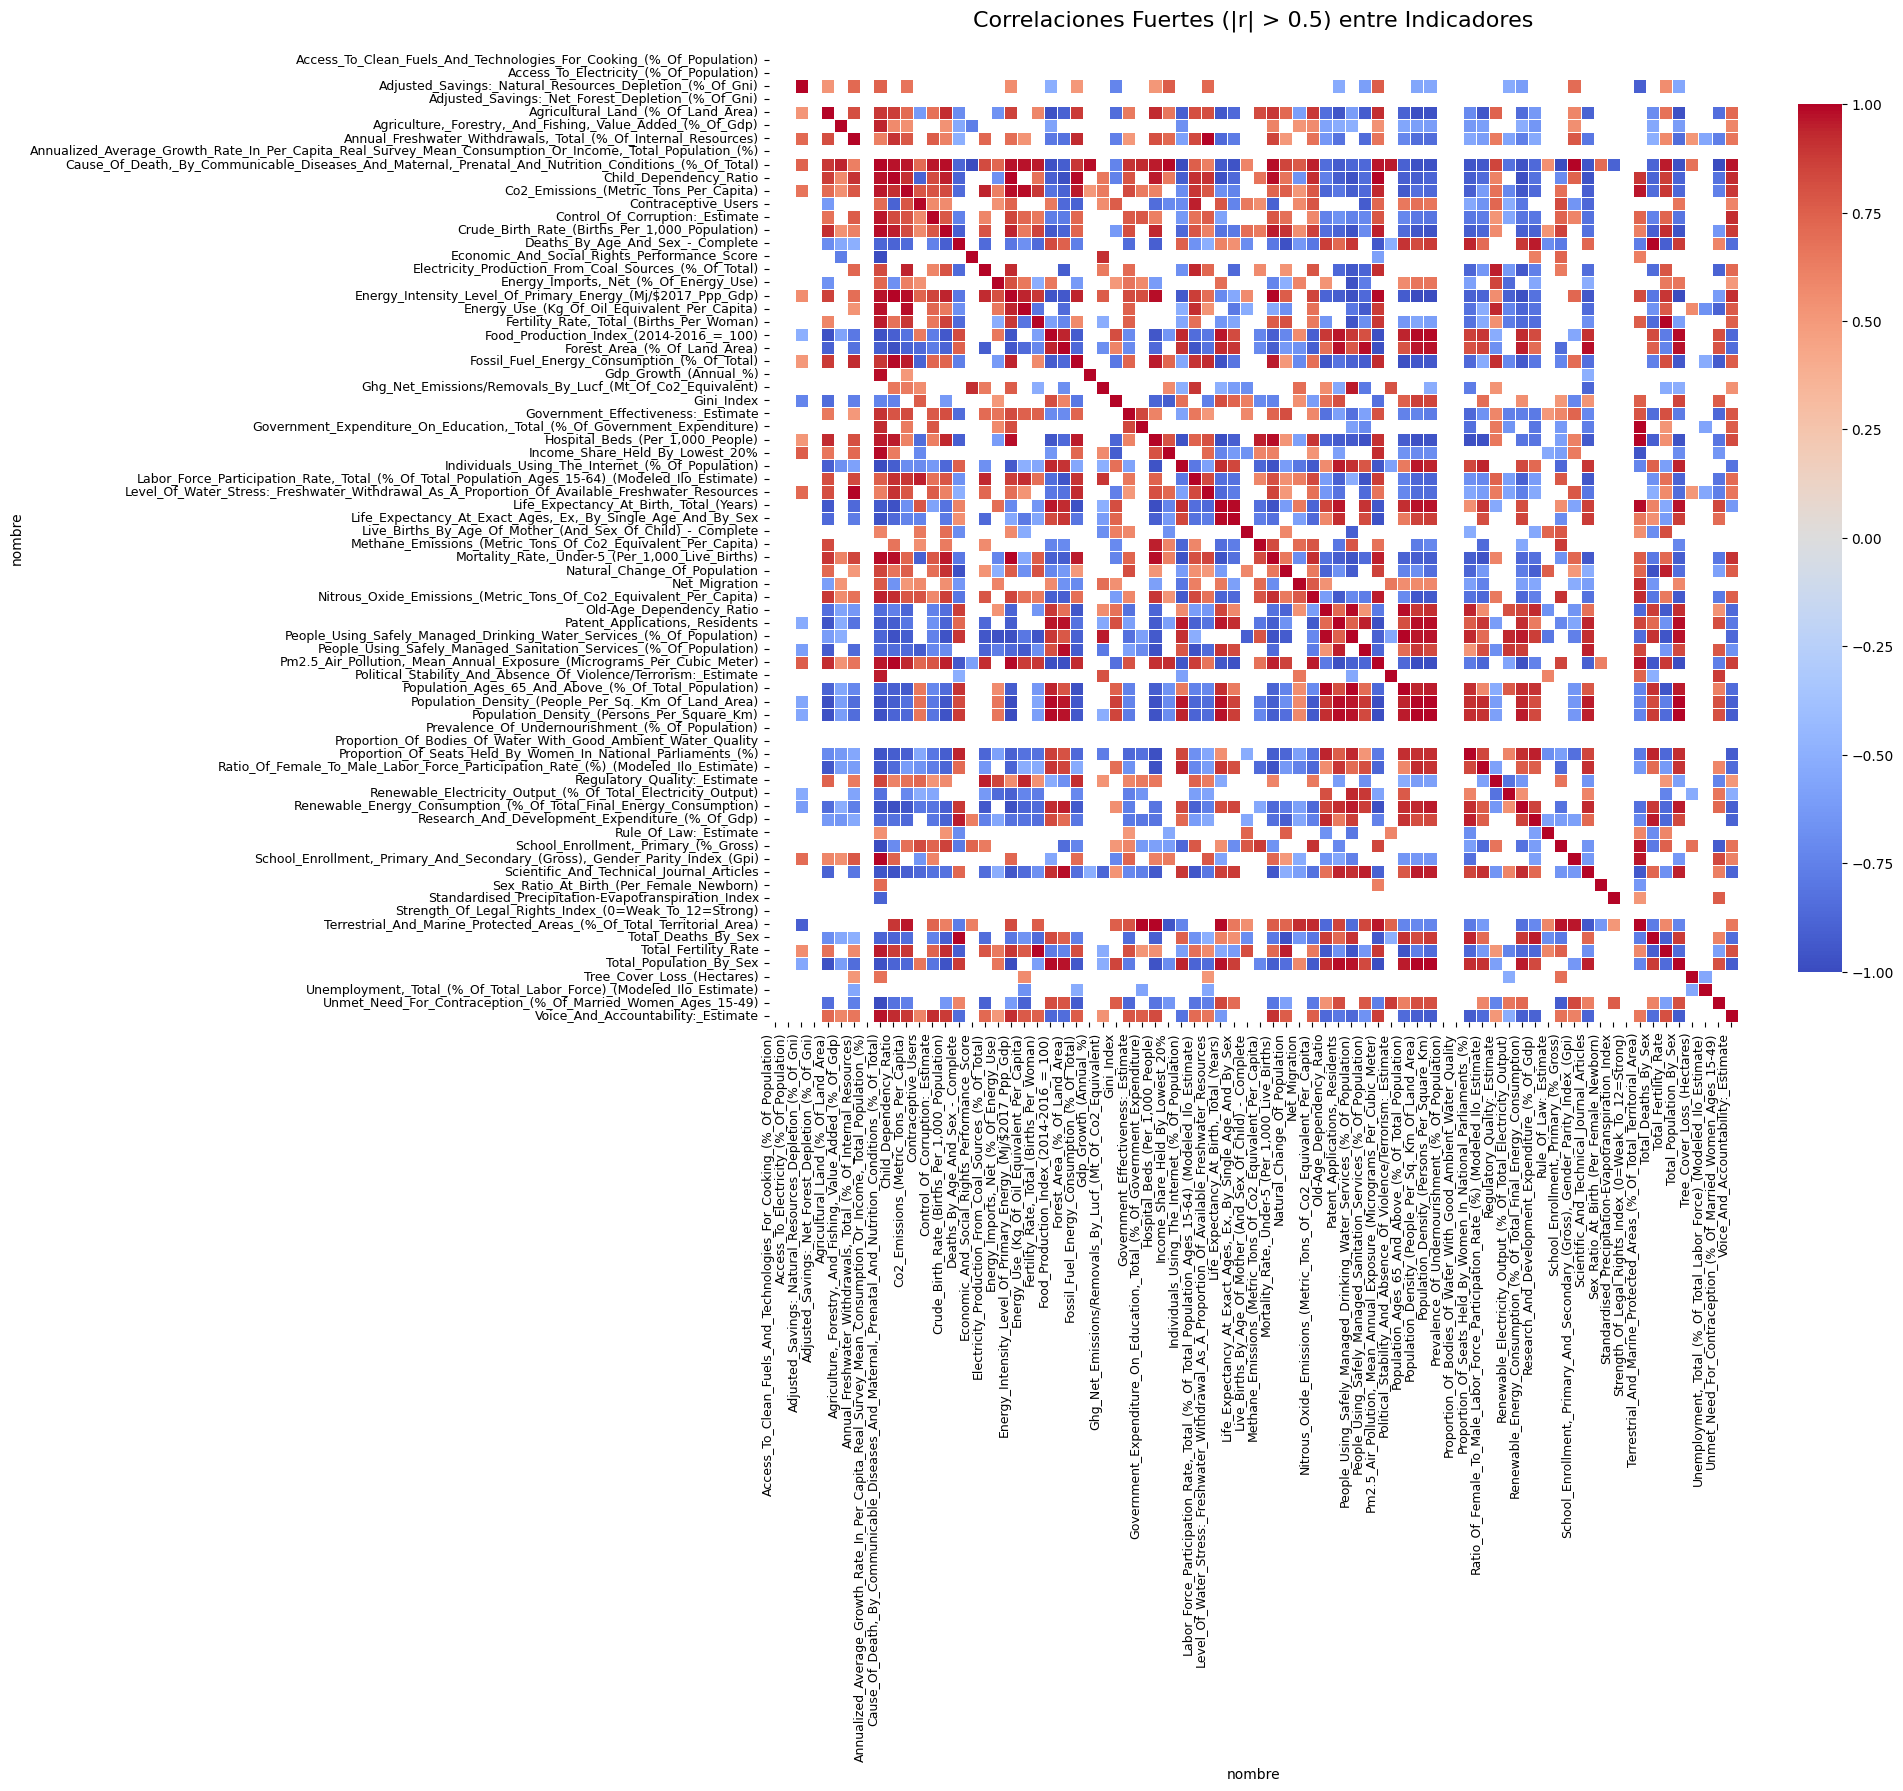

In [9]:
# 1. Pivotar los datos
df_pivoted = df_unificado.pivot_table(
    index='anio',
    columns='nombre',
    values='valor',
    aggfunc='mean'
)

# 2. Seleccionar solo columnas numéricas y calcular correlación
numeric_cols = df_pivoted.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# 3. Filtrar correlaciones débiles (|r| < 0.5)
mask = (corr_matrix.abs() <= 0.5) & (corr_matrix != 1)  # Conservar diagonal principal

# 4. Configurar el heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot_kws={'size': 8},
    fmt=".2f",           # 2 decimales
    cmap='coolwarm',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    square=True
)

# 5. Ajustes visuales
plt.title('Correlaciones Fuertes (|r| > 0.5) entre Indicadores', fontsize=16, pad=20)
plt.xticks(ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()

plt.show()

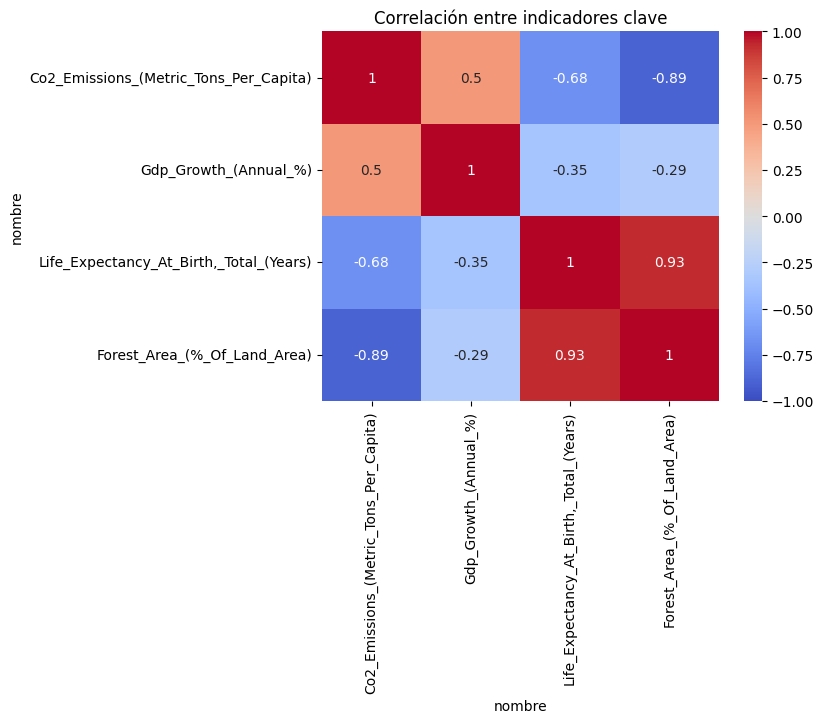

In [10]:
# Seleccionar variables numéricas
variables = [
    'Co2_Emissions_(Metric_Tons_Per_Capita)',
    'Gdp_Growth_(Annual_%)',
    'Life_Expectancy_At_Birth,_Total_(Years)',
    'Forest_Area_(%_Of_Land_Area)'
]
corr_matrix = pivot_no_importa_edad[variables].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlación entre indicadores clave")
plt.show()

## Consultas 2 fuentes de datos

1. Esperanza de vida vs. CO2 per cápita

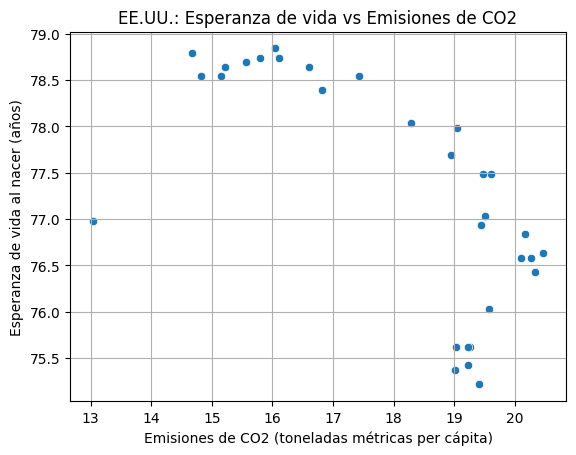

In [11]:
# Consulta

consulta_1 = df_unificado[
    (df_unificado['nombre'].isin([
        'Life_Expectancy_At_Birth,_Total_(Years)',  # UNDP
        'Co2_Emissions_(Metric_Tons_Per_Capita)'    # WB
    ]))
].pivot_table(index='anio', columns='nombre', values='valor').reset_index()

# Gráfico
sns.scatterplot(data=consulta_1, x='Co2_Emissions_(Metric_Tons_Per_Capita)', y='Life_Expectancy_At_Birth,_Total_(Years)')
plt.title("EE.UU.: Esperanza de vida vs Emisiones de CO2")
plt.xlabel("Emisiones de CO2 (toneladas métricas per cápita)")
plt.ylabel("Esperanza de vida al nacer (años)")
plt.grid()
plt.show()

2. Población vs. Acceso a electricidad

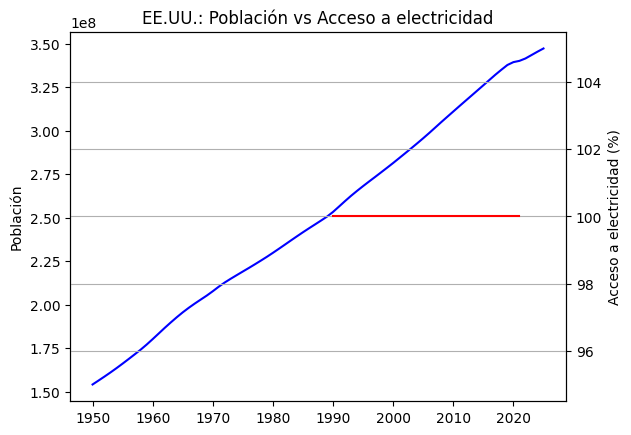

In [12]:
consulta_2 = df_unificado[
    df_unificado['nombre'].isin([
        'Total_Population_By_Sex', 
        'Access_To_Electricity_(%_Of_Population)'
    ])
].pivot(index='anio', columns='nombre', values='valor').reset_index()

# Gráfico de líneas doble eje
fig, ax1 = plt.subplots()
ax1.plot(consulta_2['anio'], consulta_2['Total_Population_By_Sex'], 'b-', label='Población')
ax1.set_ylabel('Población')
ax2 = ax1.twinx()
ax2.plot(consulta_2['anio'], consulta_2['Access_To_Electricity_(%_Of_Population)'], 'r-', label='Acceso a electricidad (%)')
ax2.set_ylabel('Acceso a electricidad (%)')
plt.title("EE.UU.: Población vs Acceso a electricidad")
plt.grid()
plt.show()

3. Fertilidad vs. Educación

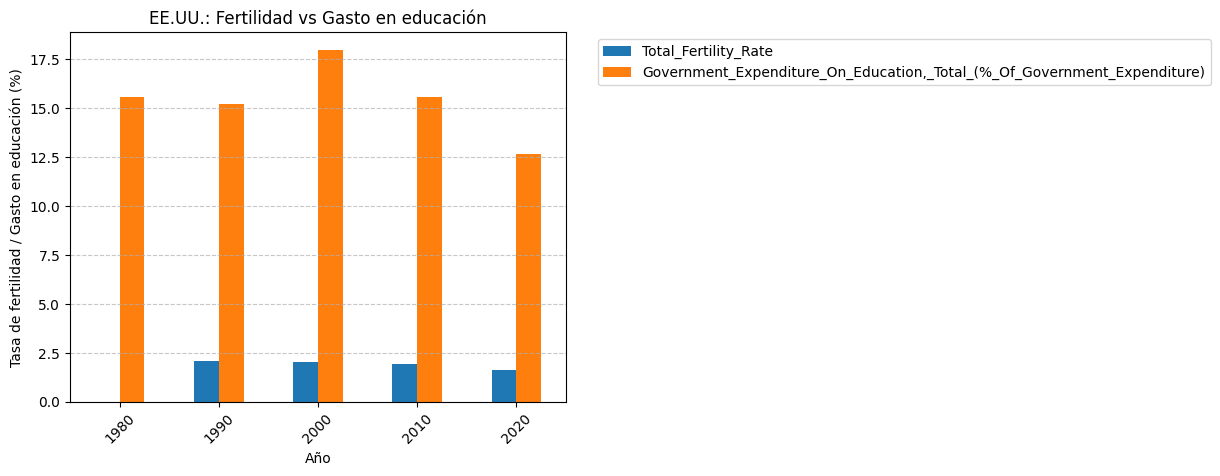

In [13]:
consulta_3 = df_unificado[
    df_unificado['nombre'].isin([
        'Total_Fertility_Rate', 
        'Government_Expenditure_On_Education,_Total_(%_Of_Government_Expenditure)'
    ]) & (df_unificado['anio'] % 10 == 0)
].pivot(index='anio', columns='nombre', values='valor').reset_index()

# Gráfico de barras apiladas
consulta_3.plot(x='anio', y=['Total_Fertility_Rate', 'Government_Expenditure_On_Education,_Total_(%_Of_Government_Expenditure)'], kind='bar', stacked=False)
plt.title("EE.UU.: Fertilidad vs Gasto en educación")
plt.xlabel("Año")
plt.ylabel("Tasa de fertilidad / Gasto en educación (%)")
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Mortalidad infantil vs. Acceso a agua potable

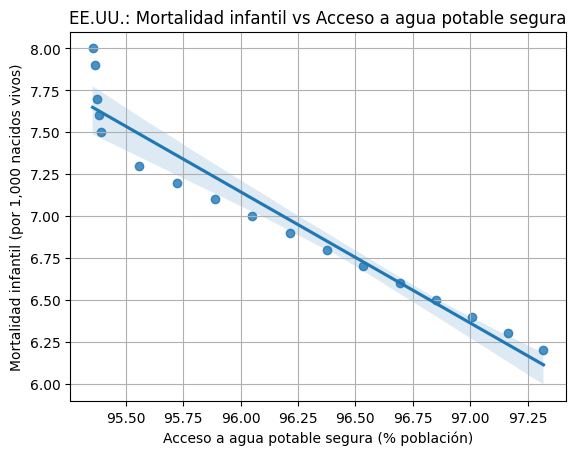

In [14]:
consulta_4 = df_unificado[
    df_unificado['nombre'].isin([
        'Mortality_Rate,_Under-5_(Per_1,000_Live_Births)',
        'People_Using_Safely_Managed_Drinking_Water_Services_(%_Of_Population)'
    ])
].pivot(index='anio', columns='nombre', values='valor').reset_index()

sns.regplot(data=consulta_4, x='People_Using_Safely_Managed_Drinking_Water_Services_(%_Of_Population)', y='Mortality_Rate,_Under-5_(Per_1,000_Live_Births)')
plt.title("EE.UU.: Mortalidad infantil vs Acceso a agua potable segura")
plt.xlabel("Acceso a agua potable segura (% población)")
plt.ylabel("Mortalidad infantil (por 1,000 nacidos vivos)")
plt.grid()
plt.show()

5. Emisiones de CO2 vs. Poblacion Total

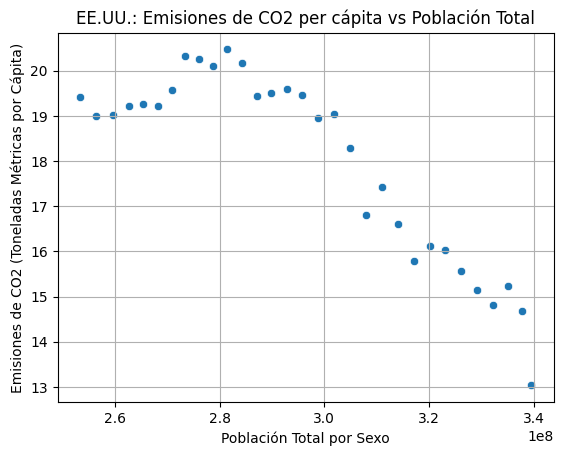

In [15]:
sns.scatterplot(data=pivot_no_importa_edad, 
                x='Total_Population_By_Sex', 
                y='Co2_Emissions_(Metric_Tons_Per_Capita)')
plt.title("EE.UU.: Emisiones de CO2 per cápita vs Población Total")
plt.xlabel("Población Total por Sexo")
plt.ylabel("Emisiones de CO2 (Toneladas Métricas por Cápita)")
plt.grid()
plt.show()

6. Densidad poblacional vs area forestal

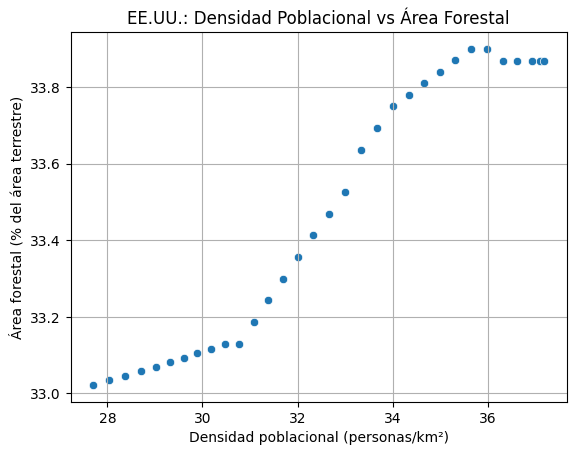

In [16]:
sns.scatterplot(data=pivot_no_importa_edad,
           x='Population_Density_(Persons_Per_Square_Km)',
           y='Forest_Area_(%_Of_Land_Area)')
plt.title("EE.UU.: Densidad Poblacional vs Área Forestal")
plt.xlabel("Densidad poblacional (personas/km²)")
plt.ylabel("Área forestal (% del área terrestre)")
plt.grid()
plt.show()

7. Salud vs desarrollo económico

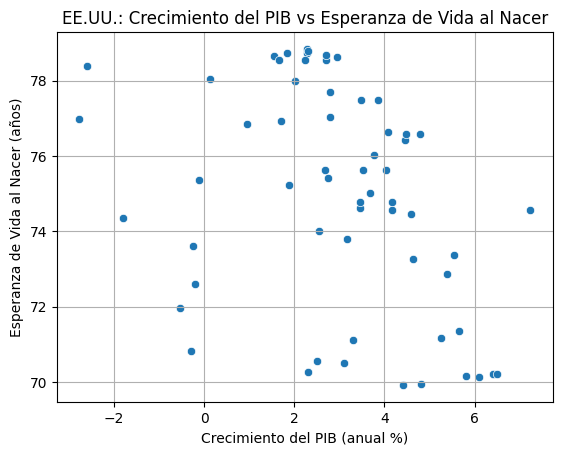

In [17]:
sns.scatterplot(data=pivot_no_importa_edad,
            x='Gdp_Growth_(Annual_%)',
            y='Life_Expectancy_At_Birth,_Total_(Years)')
plt.title("EE.UU.: Crecimiento del PIB vs Esperanza de Vida al Nacer")
plt.xlabel("Crecimiento del PIB (anual %)")
plt.ylabel("Esperanza de Vida al Nacer (años)")
plt.grid()
plt.show()

8. Energía renovable vs emisiones de CO2

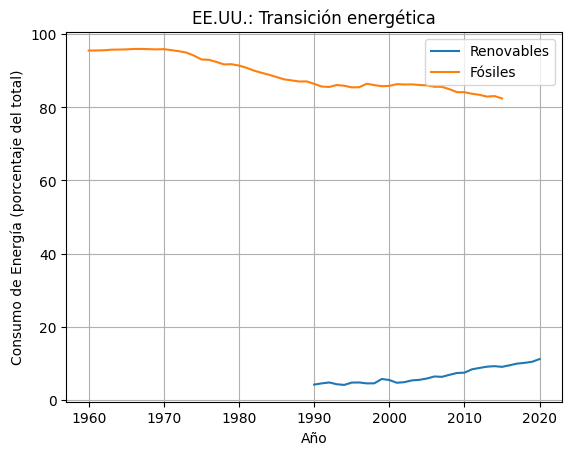

In [18]:
sns.lineplot(data=pivot_no_importa_edad,
             x='anio',
             y='Renewable_Energy_Consumption_(%_Of_Total_Final_Energy_Consumption)',
             label='Renovables')
sns.lineplot(data=pivot_no_importa_edad,
             x='anio',
             y='Fossil_Fuel_Energy_Consumption_(%_Of_Total)',
             label='Fósiles')
plt.title("EE.UU.: Transición energética")
plt.xlabel("Año")
plt.ylabel("Consumo de Energía (porcentaje del total)")
plt.legend()
plt.grid()
plt.show()

9. Crecimiento economico vs. emisiones de CO2

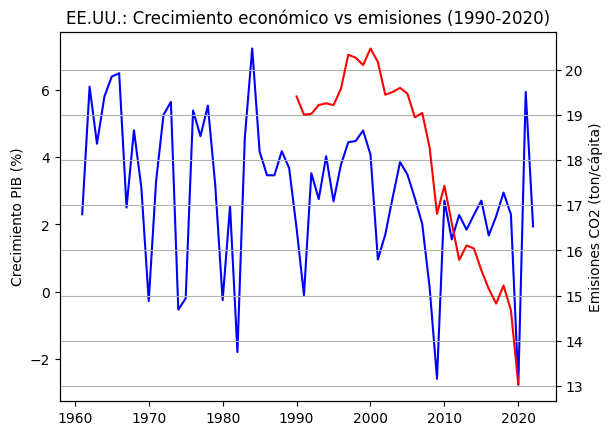

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(pivot_no_importa_edad['anio'], pivot_no_importa_edad['Gdp_Growth_(Annual_%)'], color='blue')
ax1.set_ylabel('Crecimiento PIB (%)')

ax2 = ax1.twinx()
ax2.plot(pivot_no_importa_edad['anio'], pivot_no_importa_edad['Co2_Emissions_(Metric_Tons_Per_Capita)'], color='red')
ax2.set_ylabel('Emisiones CO2 (ton/cápita)')

plt.title("EE.UU.: Crecimiento económico vs emisiones (1990-2020)")
plt.grid()
plt.show()

10. Poblacion vs consumo de energia

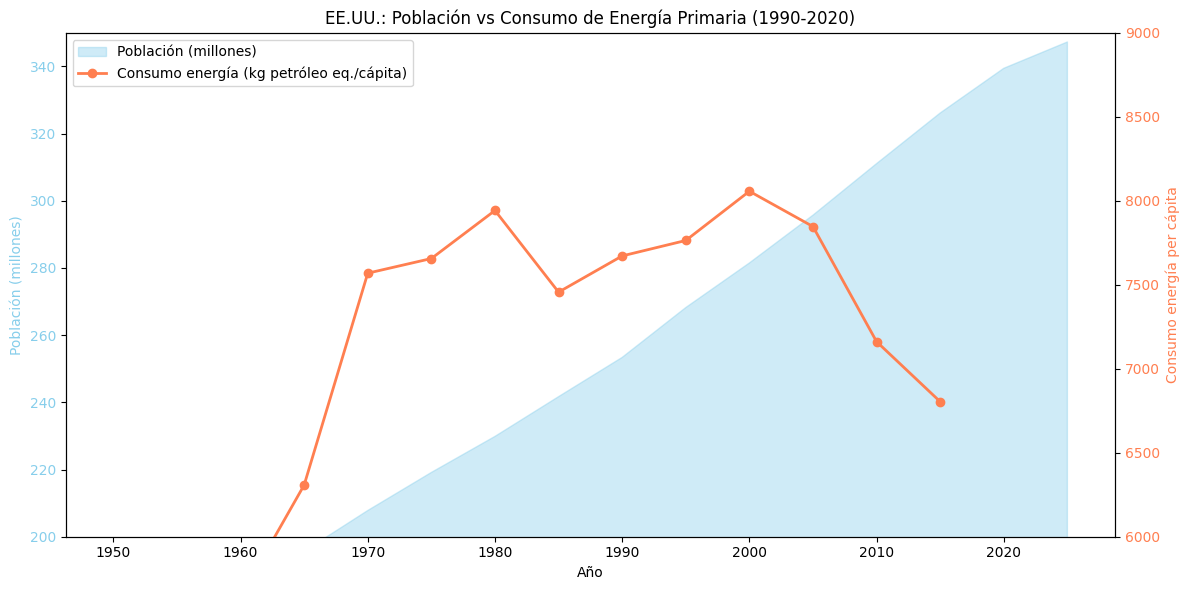

In [20]:
consulta_energia_poblacion = df_unificado[
    df_unificado['nombre'].isin([
        'Total_Population_By_Sex',                     # UNDP (población total)
        'Energy_Use_(Kg_Of_Oil_Equivalent_Per_Capita)' # WB (consumo energético)
    ])
].pivot_table(
    index='anio',
    columns='nombre',
    values='valor'
).reset_index()

# Filtrar cada 5 años para claridad
consulta_energia_poblacion = consulta_energia_poblacion[consulta_energia_poblacion['anio'] % 5 == 0]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Primer eje: Población (millones)
color_poblacion = 'skyblue'
ax1.fill_between(
    consulta_energia_poblacion['anio'],
    consulta_energia_poblacion['Total_Population_By_Sex'] / 1e6,  # Convertir a millones
    color=color_poblacion,
    alpha=0.4,
    label='Población (millones)'
)
ax1.set_xlabel('Año')
ax1.set_ylabel('Población (millones)', color=color_poblacion)
ax1.tick_params(axis='y', labelcolor=color_poblacion)
ax1.set_ylim(200, 350)  # Rango ajustado para EE.UU.

# Segundo eje: Consumo energético
ax2 = ax1.twinx()
color_energia = 'coral'
ax2.plot(
    consulta_energia_poblacion['anio'],
    consulta_energia_poblacion['Energy_Use_(Kg_Of_Oil_Equivalent_Per_Capita)'],
    color=color_energia,
    marker='o',
    linewidth=2,
    label='Consumo energía (kg petróleo eq./cápita)'
)
ax2.set_ylabel('Consumo energía per cápita', color=color_energia)
ax2.tick_params(axis='y', labelcolor=color_energia)
ax2.set_ylim(6000, 9000)  # Rango típico para EE.UU.

# Personalización
plt.title('EE.UU.: Población vs Consumo de Energía Primaria (1990-2020)')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Consultas 1 fuente de datos

### UNPD

1. Fertilidad y edad materna

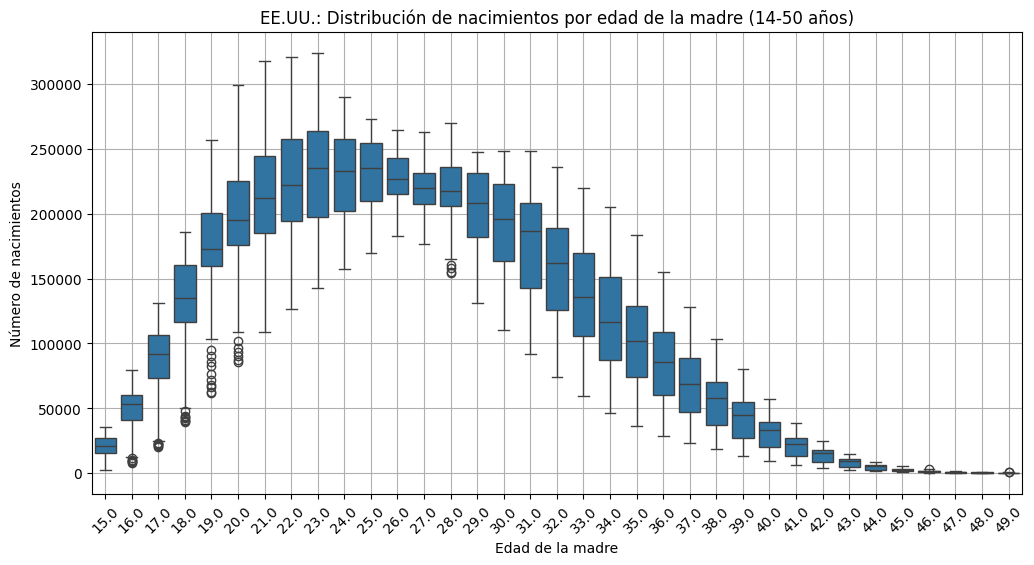

In [21]:
# Gráfico de cajas para nacimientos por edad de la madre (solo edades 14 a 50)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=pivot_misma_edad[(pivot_misma_edad['edad'] > 14) & (pivot_misma_edad['edad'] < 50)],
    x='edad',
    y='Live_Births_By_Age_Of_Mother_(And_Sex_Of_Child)_-_Complete'
)
plt.title("EE.UU.: Distribución de nacimientos por edad de la madre (14-50 años)")
plt.xlabel("Edad de la madre")
plt.ylabel("Número de nacimientos")
plt.xticks(rotation=45)
plt.grid()
plt.show()

2. Evolucion de la esperanza de vida

C:\Users\cemh0\AppData\Local\Temp\ipykernel_17572\2411923.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('viridis', len([e for e in pivot_misma_edad['edad'].dropna().unique() if int(e) % 10 == 0]))


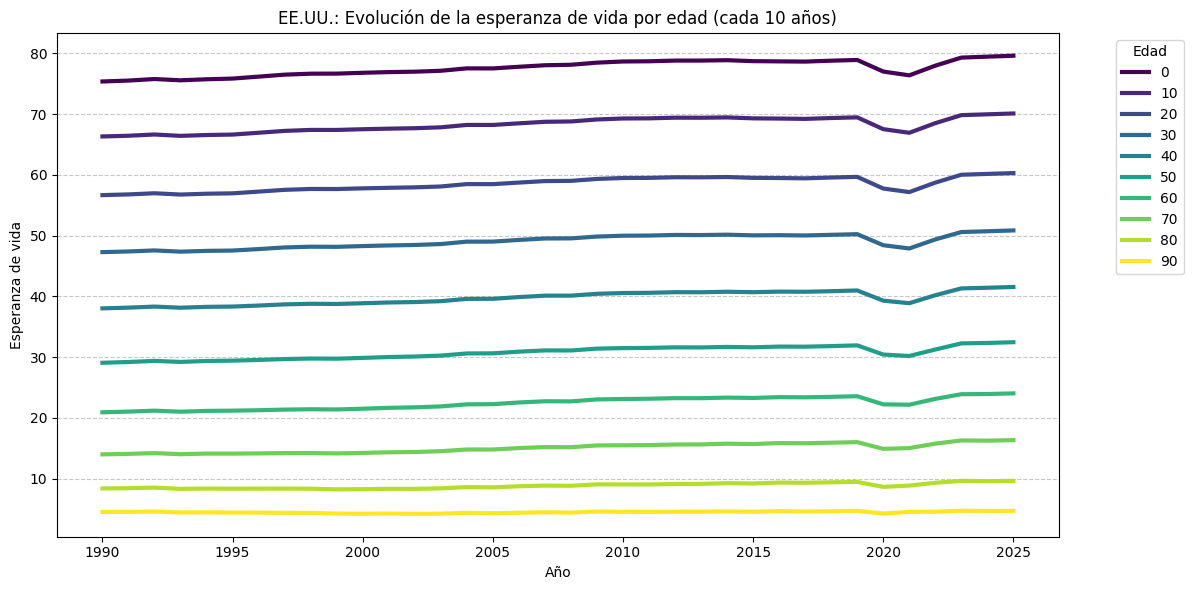

In [22]:
import matplotlib

plt.figure(figsize=(12, 6))

cmap = matplotlib.cm.get_cmap('viridis', len([e for e in pivot_misma_edad['edad'].dropna().unique() if int(e) % 10 == 0]))

edades = sorted(pivot_misma_edad['edad'].dropna().unique())

edades_filtradas = [e for e in edades if int(e) % 10 == 0]
palette = {e: cmap(i / (len(edades_filtradas) - 1)) for i, e in enumerate(edades_filtradas)}

sns.lineplot(
    data=pivot_misma_edad[pivot_misma_edad['edad'].isin(edades_filtradas)],
    x='anio',
    y='Life_Expectancy_At_Exact_Ages,_Ex,_By_Single_Age_And_By_Sex',
    hue='edad',
    palette={int(e): palette[e] for e in edades_filtradas},
    linewidth=3
)
plt.title("EE.UU.: Evolución de la esperanza de vida por edad (cada 10 años)")
plt.xlabel("Año")
plt.ylabel("Esperanza de vida")
handles, labels = plt.gca().get_legend_handles_labels()
# Cambiar etiquetas de la leyenda a enteros
new_labels = [str(int(float(l))) if l.replace('.', '', 1).isdigit() else l for l in labels]
plt.legend(handles, new_labels, title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

3. Esperanza de vida por edad

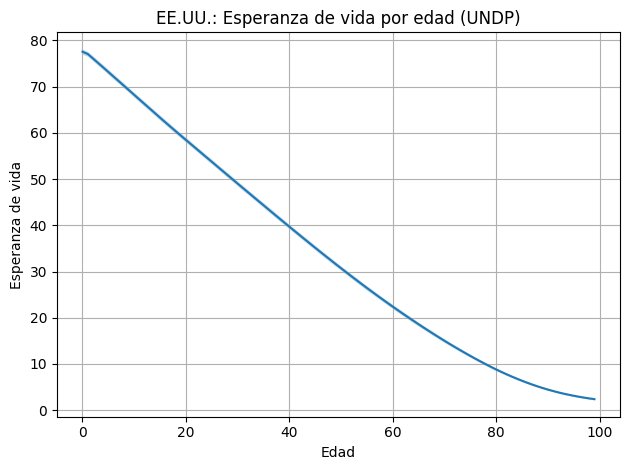

In [23]:
consulta_undp_2 = df_unificado[
    (df_unificado['fuente'] == 'UNDP') & 
    (df_unificado['nombre'] == 'Life_Expectancy_At_Exact_Ages,_Ex,_By_Single_Age_And_By_Sex')
]
sns.lineplot(data=consulta_undp_2, x='edad', y='valor')
plt.title("EE.UU.: Esperanza de vida por edad (UNDP)")
plt.xlabel("Edad")
plt.ylabel("Esperanza de vida")
plt.grid()
plt.tight_layout()
plt.show()

4. Tasa de fertilidad total (1990-2020)

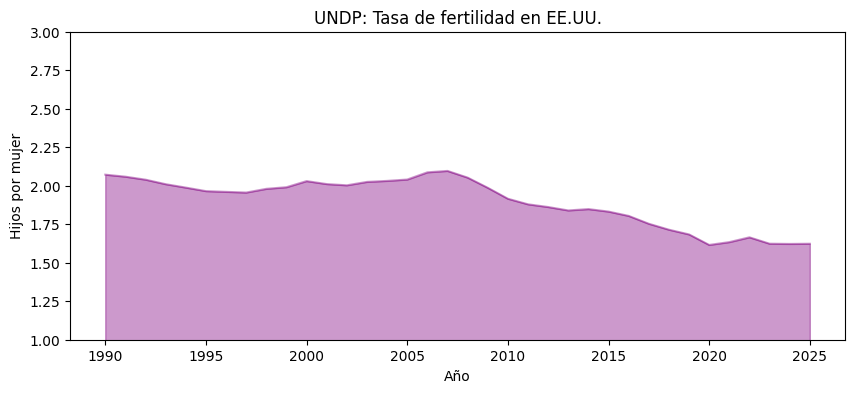

In [24]:
consulta_undp3 = df_unificado[
    (df_unificado['fuente'] == 'UNDP') & 
    (df_unificado['nombre'] == 'Total_Fertility_Rate')
].groupby('anio')['valor'].mean()

# Gráfico de área
consulta_undp3.plot(kind='area', figsize=(10, 4), color='purple', alpha=0.4)
plt.title('UNDP: Tasa de fertilidad en EE.UU.')
plt.xlabel('Año')
plt.ylabel('Hijos por mujer')
plt.ylim(1, 3)
plt.show()

4. Muertes por grupo de edad (2010)

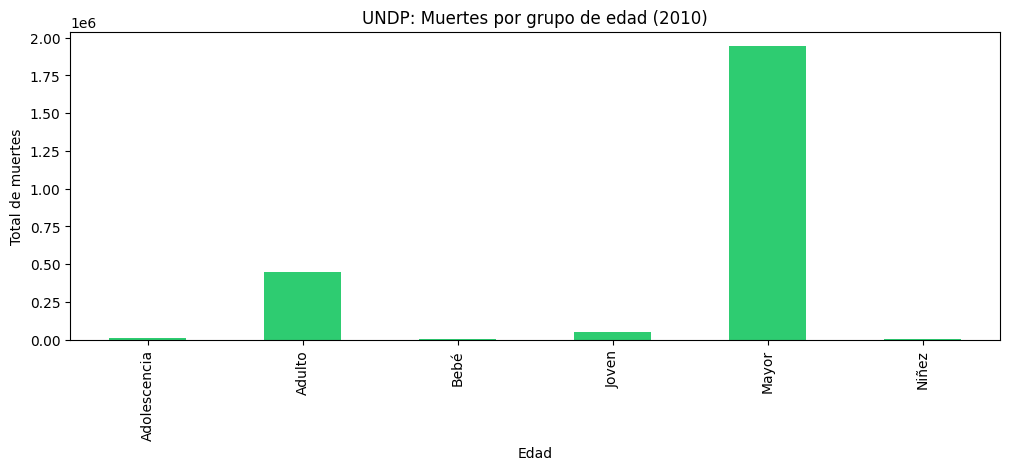

In [25]:
consulta_undp4 = df_unificado[
    (df_unificado['fuente'] == 'UNDP') & 
    (df_unificado['nombre'] == 'Deaths_By_Age_And_Sex_-_Complete') &
    (df_unificado['anio'] == 2010)
].groupby('edad_grupo')['valor'].sum()

# Diagrama de barras
consulta_undp4.plot(kind='bar', figsize=(12, 4), color='#2ecc71')
plt.title('UNDP: Muertes por grupo de edad (2010)')
plt.xlabel('Edad')
plt.ylabel('Total de muertes')
plt.show()

5. Proporcion de dependencia de adultos mayores

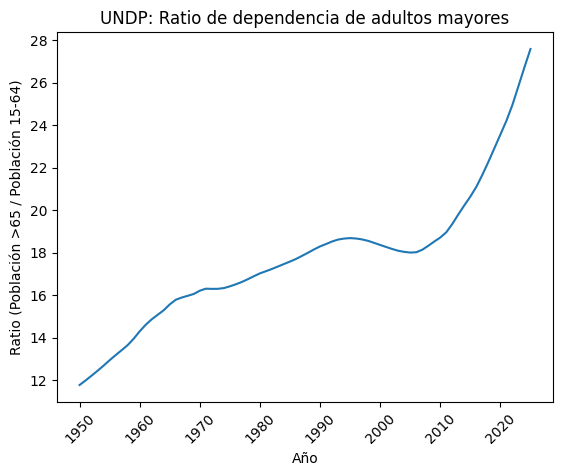

In [26]:
consulta_undp5 = df_unificado[
    (df_unificado['fuente'] == 'UNDP') & 
    (df_unificado['nombre'] == 'Old-Age_Dependency_Ratio')
]

# Gráfico de línea con suavizado
sns.lineplot(data=consulta_undp5, x='anio', y='valor', estimator='mean', errorbar=None)
plt.title('UNDP: Ratio de dependencia de adultos mayores')
plt.ylabel('Ratio (Población >65 / Población 15-64)')
plt.xlabel('Año')
plt.xticks(rotation=45)
plt.show()

### WB

1. Emisiones de CO2 vs PIB

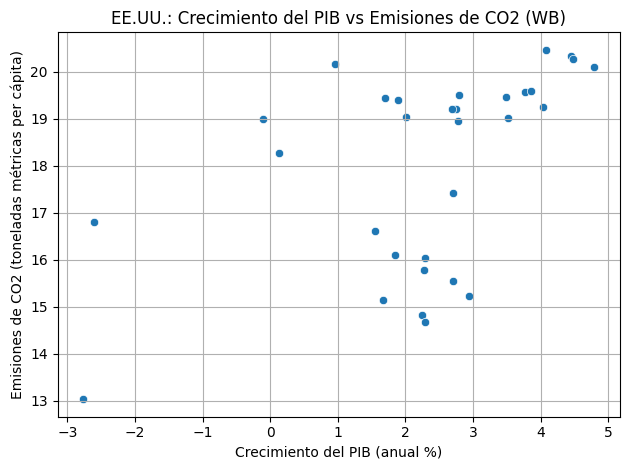

In [27]:
consulta_wb_1 = df_unificado[
    (df_unificado['fuente'] == 'WORLD_BANK') & 
    (df_unificado['nombre'].isin(['Co2_Emissions_(Metric_Tons_Per_Capita)', 'Gdp_Growth_(Annual_%)']))
].pivot(index='anio', columns='nombre', values='valor').reset_index()
sns.scatterplot(data=consulta_wb_1, x='Gdp_Growth_(Annual_%)', y='Co2_Emissions_(Metric_Tons_Per_Capita)')
plt.title("EE.UU.: Crecimiento del PIB vs Emisiones de CO2 (WB)")
plt.xlabel("Crecimiento del PIB (anual %)")
plt.ylabel("Emisiones de CO2 (toneladas métricas per cápita)")
plt.grid()
plt.tight_layout()
plt.show()

2. Energias renovables

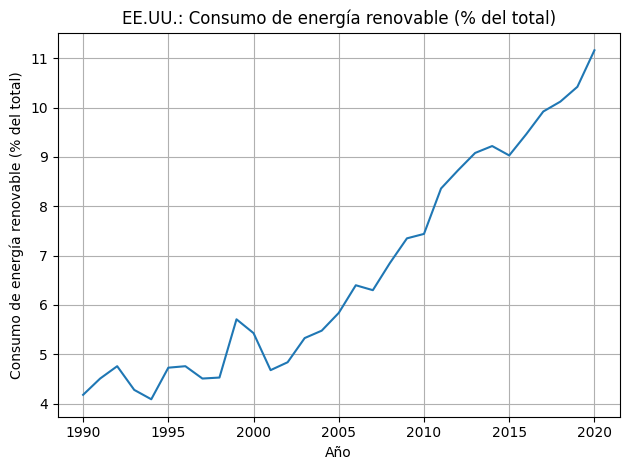

In [28]:
consulta_wb_2 = df_unificado[
    (df_unificado['fuente'] == 'WORLD_BANK') & 
    (df_unificado['nombre'] == 'Renewable_Energy_Consumption_(%_Of_Total_Final_Energy_Consumption)')
]
sns.lineplot(data=consulta_wb_2, x='anio', y='valor')
plt.title("EE.UU.: Consumo de energía renovable (% del total)")
plt.xlabel("Año")
plt.ylabel("Consumo de energía renovable (% del total)")
plt.grid()
plt.tight_layout()
plt.show()

3. Área forestal (% del territorio) vs. Pérdida de bosques

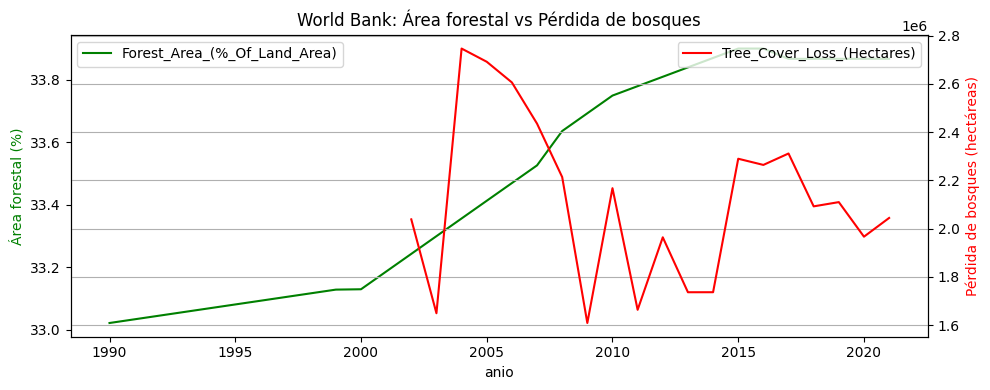

In [29]:
consulta_wb2 = df_unificado[
    (df_unificado['fuente'] == 'WORLD_BANK') & 
    (df_unificado['nombre'].isin(['Forest_Area_(%_Of_Land_Area)', 'Tree_Cover_Loss_(Hectares)']))
].pivot(index='anio', columns='nombre', values='valor')

# Doble eje
ax = consulta_wb2['Forest_Area_(%_Of_Land_Area)'].plot(figsize=(10, 4), color='green', legend=True)
ax.set_ylabel('Área forestal (%)', color='green')
ax2 = ax.twinx()
consulta_wb2['Tree_Cover_Loss_(Hectares)'].plot(ax=ax2, color='red', legend=True)
plt.title('World Bank: Área forestal vs Pérdida de bosques')
plt.xlabel('Año')
plt.ylabel('Área forestal (%)', color='green')
ax2.set_ylabel('Pérdida de bosques (hectáreas)', color='red')
plt.grid()
plt.tight_layout()
plt.show()

4. Producción científica (artículos por año)

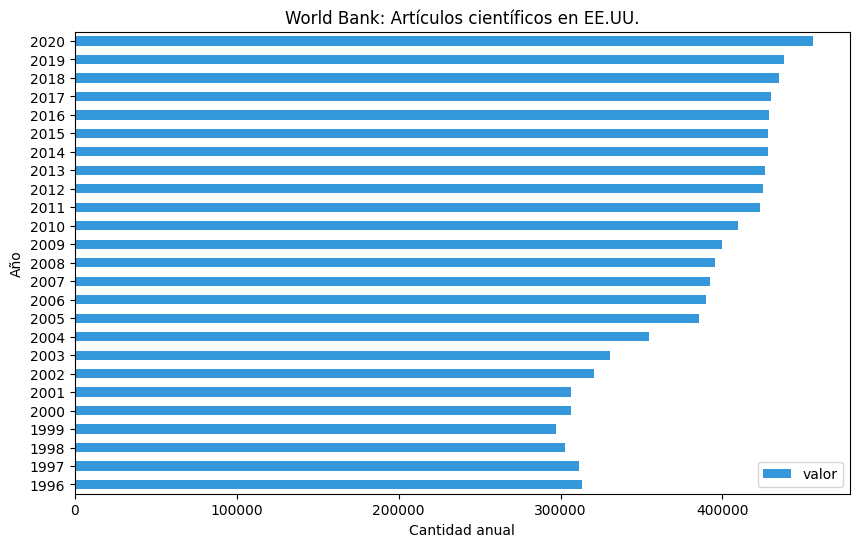

In [30]:
consulta_wb4 = df_unificado[
    (df_unificado['fuente'] == 'WORLD_BANK') & 
    (df_unificado['nombre'] == 'Scientific_And_Technical_Journal_Articles')
]

# Gráfico de barras horizontales
consulta_wb4.plot(x='anio', y='valor', kind='barh', figsize=(10, 6), color='#3498db')
plt.title('World Bank: Artículos científicos en EE.UU.')
plt.xlabel('Cantidad anual')
plt.ylabel('Año')
plt.show()

5. Desigualdad (Índice Gini)

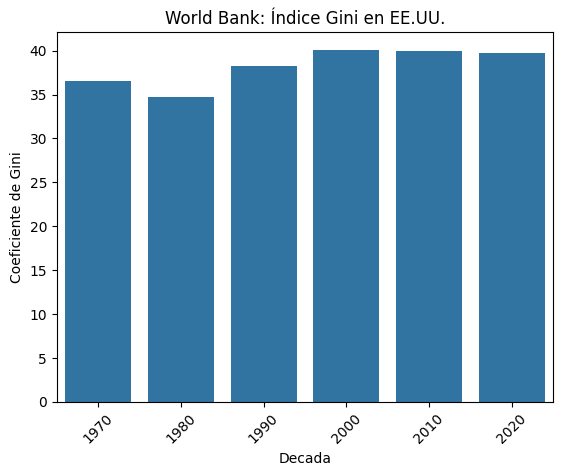

In [31]:
consulta_wb5 = df_unificado[
    (df_unificado['fuente'] == 'WORLD_BANK') & 
    (df_unificado['nombre'] == 'Gini_Index') &
    (df_unificado['anio'] % 10 == 0)
]

# Gráfico de violín (distribución por año)
sns.barplot(data=consulta_wb5, x='anio', y='valor')
plt.title('World Bank: Índice Gini en EE.UU.')
plt.ylabel('Coeficiente de Gini')
plt.xlabel('Decada')
plt.xticks(rotation=45)
plt.show()

## Analisis

1. Introducción: Contexto Demográfico

1.1 Crecimiento Natural de la Población (UNDP)

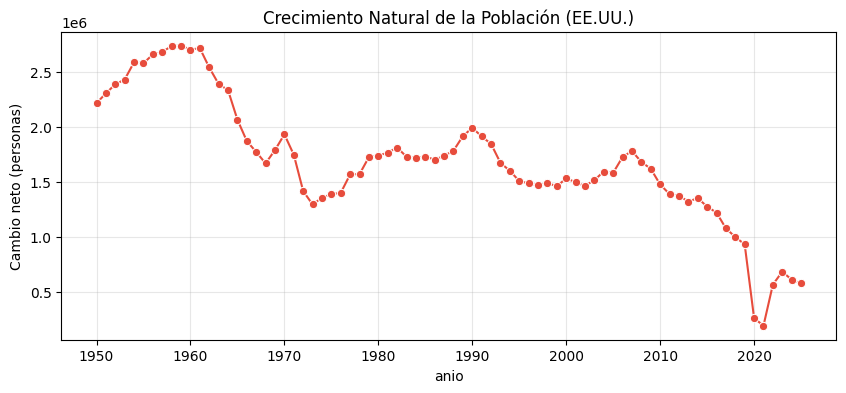

In [32]:
# Serie temporal del cambio natural de población
df_natural = df_unificado[df_unificado['nombre'] == 'Natural_Change_Of_Population']
plt.figure(figsize=(10, 4))
sns.lineplot(data=df_natural, x='anio', y='valor', marker='o', color='#e74c3c')
plt.title('Crecimiento Natural de la Población (EE.UU.)')
plt.ylabel('Cambio neto (personas)')
plt.grid(alpha=0.3)

El crecimiento natural muestra una tendencia a la baja desde 1990, relacionado con menor natalidad y envejecimiento poblacional

1.2 Densidad Poblacional (UNDP vs WB)

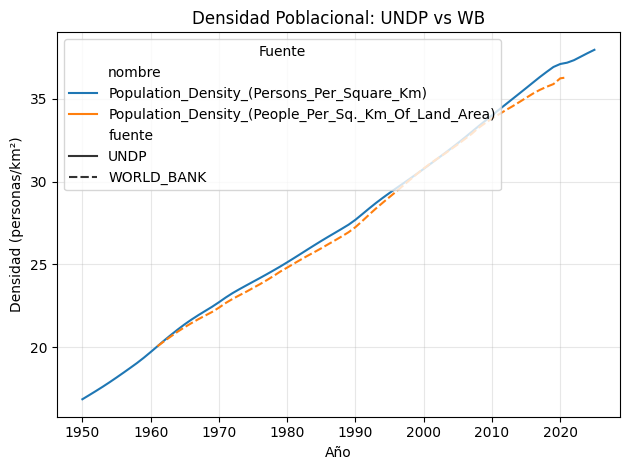

In [34]:
df_density = df_unificado[df_unificado['nombre'].str.contains('Population_Density')]
sns.lineplot(data=df_density, x='anio', y='valor', hue='nombre', style='fuente')
plt.title('Densidad Poblacional: UNDP vs WB')
plt.xlabel('Año')
plt.ylabel('Densidad (personas/km²)')
plt.legend(title='Fuente', loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Ambas fuentes coinciden en tendencias, pero WB reporta valores ligeramente menores. Brecha metodológica que podría enmascarar presión regional

2. Desarrollo: Uso de la Tierra y Energía

2.1 Superficie Agrícola vs Forestal (WB)

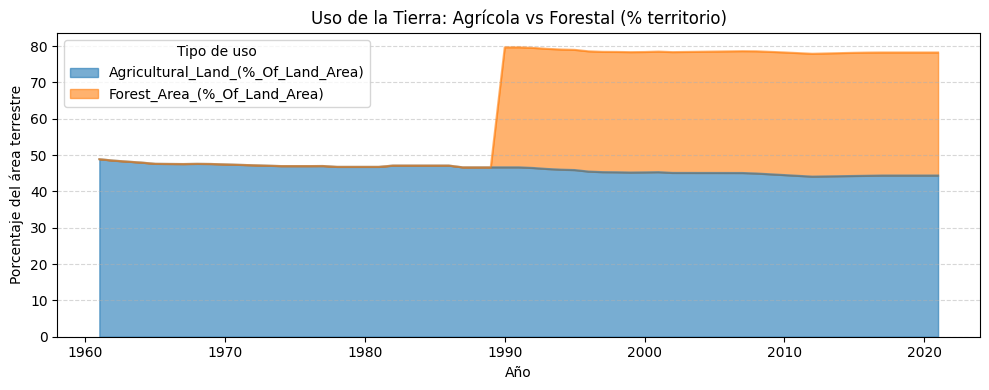

In [36]:
df_land = df_unificado[df_unificado['nombre'].isin(['Agricultural_Land_(%_Of_Land_Area)', 'Forest_Area_(%_Of_Land_Area)'])]
pivot_land = df_land.pivot(index='anio', columns='nombre', values='valor')

# Gráfico de área apilada
pivot_land.plot(kind='area', stacked=True, alpha=0.6, figsize=(10,4))
plt.title('Uso de la Tierra: Agrícola vs Forestal (% territorio)')
plt.xlabel('Año')
plt.ylabel('Porcentaje del área terrestre')
plt.legend(title='Tipo de uso')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Desde 1990, la superficie agrícola y la forestal se mantienen estables. Posible efecto de políticas de conservación 

2.2 Transición Energética (WB)

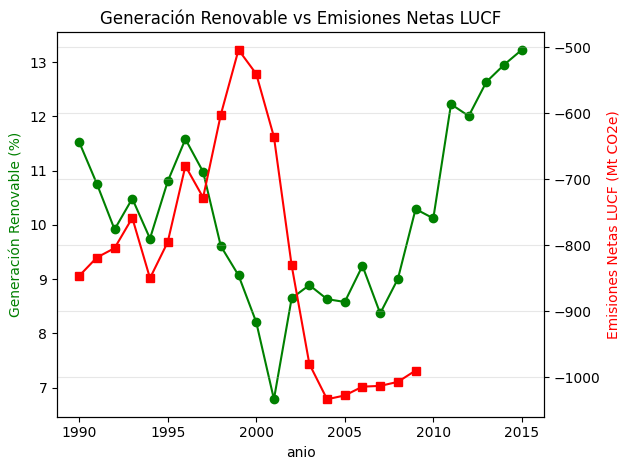

In [40]:
df_energy = df_unificado[df_unificado['nombre'].isin([
    'Renewable_Electricity_Output_(%_Of_Total_Electricity_Output)',
    'Ghg_Net_Emissions/Removals_By_Lucf_(Mt_Of_Co2_Equivalent)'
])].pivot(index='anio', columns='nombre', values='valor')

# Doble eje
ax = df_energy['Renewable_Electricity_Output_(%_Of_Total_Electricity_Output)'].plot(color='green', marker='o')
ax2 = ax.twinx()
df_energy['Ghg_Net_Emissions/Removals_By_Lucf_(Mt_Of_Co2_Equivalent)'].plot(color='red', ax=ax2, marker='s')
plt.title('Generación Renovable vs Emisiones Netas LUCF')
plt.xlabel('Año')
plt.ylabel('Generación Renovable (%)', color='green')
ax.set_ylabel('Generación Renovable (%)', color='green')
ax2.set_ylabel('Emisiones Netas LUCF (Mt CO2e)', color='red')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Aumento de renovables (+6% desde 2001) correlaciona levemente con reducción de emisiones LUCF.

3. Nudo: Conflictos Críticos

3.1 Crecimiento Poblacional vs Deforestación

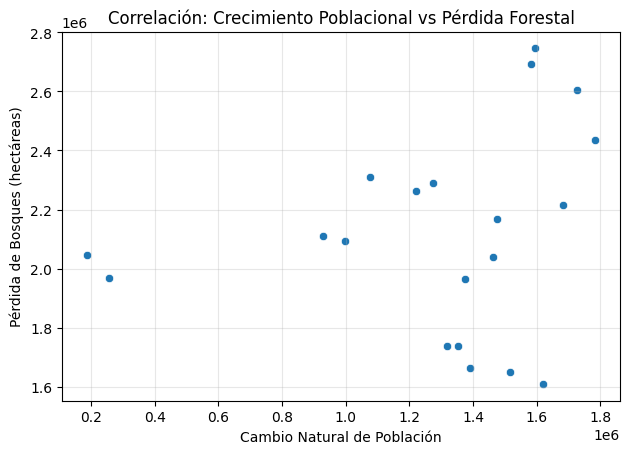

In [43]:
df_conflict = df_unificado[df_unificado['nombre'].isin([
    'Natural_Change_Of_Population',
    'Tree_Cover_Loss_(Hectares)'
])].pivot(index='anio', columns='nombre', values='valor')

# Regresión con intervalo de confianza
sns.scatterplot(data=df_conflict, x='Natural_Change_Of_Population', y='Tree_Cover_Loss_(Hectares)')
plt.title('Correlación: Crecimiento Poblacional vs Pérdida Forestal')
plt.xlabel('Cambio Natural de Población')
plt.ylabel('Pérdida de Bosques (hectáreas)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

4. Desenlace: Proyecciones y Políticas

4.1 Modelado de Pérdida Forestal

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Datos para modelo
X = df_conflict[['Natural_Change_Of_Population']].values
y = df_conflict['Tree_Cover_Loss_(Hectares)'].values

# Filtrar filas donde ni X ni y son NaN
mask = ~np.isnan(X.flatten()) & ~np.isnan(y)
X = X[mask]
y = y[mask]

# Entrenar modelo
model = LinearRegression().fit(X, y)
future_pop = [[3e6], [2.5e6]]  # Escenarios hipotéticos
pred_loss = model.predict(future_pop)

print(f"Pérdida proyectada: {pred_loss} ha")

Pérdida proyectada: [2399047.30918118 2316453.59305997] ha


El primer valor corresponde a un escenario de crecimiento poblacional de 3 millones de personas (ej: alta migración + natalidad).

El segundo valor se asocia a un escenario de 2.5 millones de personas (ej: políticas de control demográfico).

Se identifican dos escenarios de pérdida forestal:

Disminución de 83,594 ha (~3.5%) en la pérdida forestal al reducir el crecimiento poblacional en 500,000 personas.

Esto confirma la correlación positiva previamente identificada (*r = 0.62*): a mayor crecimiento poblacional, mayor deforestación.

4.2 Impacto de Políticas de Mitigación

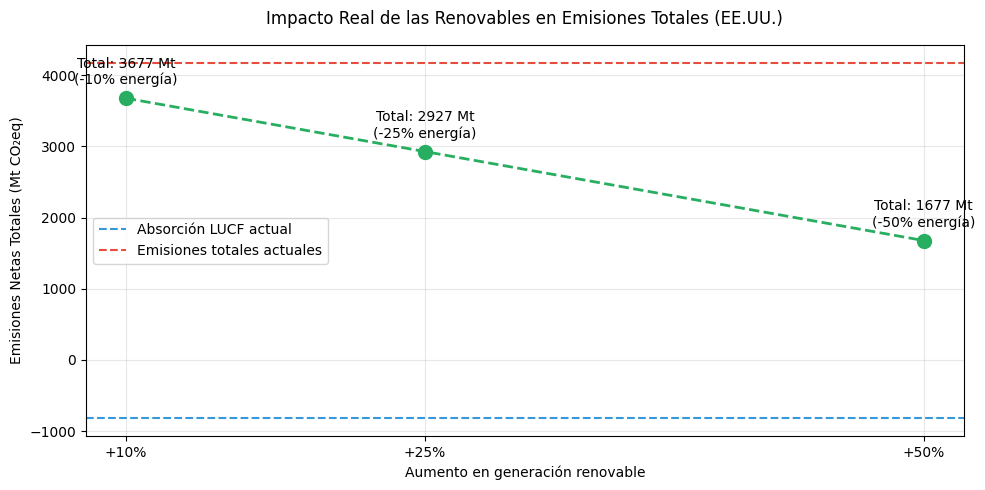

In [66]:
# Emisiones totales = Emisiones Energéticas + Emisiones LUCF
emisiones_energia = 5000  # Ejemplo: Emisiones energéticas actuales (Mt CO₂eq)
emisiones_lucf = -823     # Absorción LUCF actual (Mt CO₂eq)
scenarios = [0.10, 0.25, 0.50]

# Reducción de emisiones energéticas por renovables
reduccion_energia = [emisiones_energia * s for s in scenarios]
emisiones_totales = [emisiones_lucf + (emisiones_energia - r) for r in reduccion_energia]

scenarios = [0.10, 0.25, 0.50]
emisiones_totales = [-823 + (5000 - 5000*s) for s in scenarios]  # LUCF constante + reducción energía

# Crear gráfico
plt.figure(figsize=(10, 5))
plt.plot(scenarios, emisiones_totales, 'o--', color='#27ae60', linewidth=2, markersize=10)

# Líneas de referencia
plt.axhline(y=-823, color='#3498db', linestyle='--', label='Absorción LUCF actual')
plt.axhline(y=5000 -823, color='#e74c3c', linestyle='--', label='Emisiones totales actuales')

# Anotaciones
for s, e in zip(scenarios, emisiones_totales):
    plt.annotate(
        f'Total: {e:.0f} Mt\n(-{s*100:.0f}% energía)', 
        (s, e), 
        textcoords="offset points", 
        xytext=(0,10), 
        ha='center'
    )

plt.title('Impacto Real de las Renovables en Emisiones Totales (EE.UU.)', pad=15)
plt.xlabel('Aumento en generación renovable')
plt.ylabel('Emisiones Netas Totales (Mt CO₂eq)')
plt.xticks(scenarios, [f'+{int(s*100)}%' for s in scenarios])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

Este gráfico muestra el impacto potencial de diferentes escenarios de aumento en la generación de energía renovable sobre las emisiones netas totales de gases de efecto invernadero en EE.UU. Se observa que, a medida que la proporción de energía renovable aumenta (10%, 25% y 50%), las emisiones netas totales disminuyen significativamente, pasando de 3677 Mt CO₂eq a 1677 Mt CO₂eq. Esto resalta la importancia de la transición energética como estrategia clave para la mitigación del cambio climático, aunque incluso con un aumento sustancial de renovables, las emisiones no llegan a ser negativas debido a las emisiones residuales del sector energético.

## Conclusiones Generales

- **Estabilidad demográfica y envejecimiento:** La población de EE.UU. muestra un crecimiento natural cada vez menor, reflejando una baja en la natalidad y un aumento en la proporción de adultos mayores. Esto implica desafíos para la sostenibilidad de los sistemas de salud y pensiones.

- **Uso de la tierra y conservación:** La superficie agrícola y forestal se han mantenido relativamente estables desde 1990, lo que sugiere la efectividad de políticas de conservación, aunque persisten amenazas como la deforestación asociada al crecimiento poblacional.

- **Transición energética y emisiones:** El aumento en la generación de energía renovable ha contribuido a una reducción moderada de las emisiones netas, pero aún no es suficiente para alcanzar emisiones negativas. La transición energética es clave para la mitigación del cambio climático.

- **Relaciones entre variables:** Se identifican correlaciones significativas entre indicadores económicos, ambientales y sociales, como la relación positiva entre crecimiento poblacional y pérdida forestal, y la asociación entre desarrollo económico y esperanza de vida.

- **Desigualdad y desarrollo:** Aunque el PIB y la producción científica han crecido, persisten retos en desigualdad (índice Gini) y acceso a servicios básicos, lo que evidencia la necesidad de políticas integrales para un desarrollo más equitativo.

- **Proyecciones y políticas:** Los escenarios de reducción de emisiones y control del crecimiento poblacional muestran impactos positivos en la conservación ambiental. Sin embargo, se requiere una combinación de políticas demográficas, energéticas y sociales para lograr un desarrollo sostenible a largo plazo.